# Sharpe Ratio and Portfolio Values

In [1]:
#Common Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import quandl

## Create a Portfolio

In [3]:
start = pd.to_datetime('2016-01-01')
end = pd.to_datetime('2017-01-01')

In [4]:
# Grabbing a bunch of tech stocks for our portfolio
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

## Normalize Prices

This is the same as cumulative daily returns

In [5]:
# Example
aapl.iloc[0]['Adj. Close']

101.78376337717

In [6]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [7]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2016-01-04,101.783763,1.000000
2016-01-05,99.233131,0.974941
2016-01-06,97.291172,0.955861
2016-01-07,93.185040,0.915520
2016-01-08,93.677776,0.920361


In [8]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,1.130640
2016-12-27,115.811668,1.137821
2016-12-28,115.317843,1.132969
2016-12-29,115.288214,1.132678
2016-12-30,114.389454,1.123848


## Allocations

Let's pretend we had the following allocations for our total portfolio:

* 30% in Apple
* 20% in Google/Alphabet
* 40% in Amazon
* 10% in IBM

Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [9]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [10]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2016-01-04,101.783763,1.000000,0.300000
2016-01-05,99.233131,0.974941,0.292482
2016-01-06,97.291172,0.955861,0.286758
2016-01-07,93.185040,0.915520,0.274656
2016-01-08,93.677776,0.920361,0.276108


## Investment

Let's pretend we invested a million dollars in this portfolio

In [11]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

## Total Portfolio Value

In [12]:
portfolio_val = pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']],axis=1)

In [13]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2016-01-04,300000.000000,200000.000000,400000.000000,100000.000000
2016-01-05,292482.202183,199091.253313,399705.774182,99497.637326
2016-01-06,286758.424300,196970.844377,397705.038617,99318.670623
2016-01-07,274655.908875,192427.110943,390908.422214,95439.488846
2016-01-08,276108.210726,187656.190837,387289.444649,95299.769227


In [14]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [15]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2016-01-04,300000.000000,200000.000000,400000.000000,100000.000000
2016-01-05,292482.202183,199091.253313,399705.774182,99497.637326
2016-01-06,286758.424300,196970.844377,397705.038617,99318.670623
2016-01-07,274655.908875,192427.110943,390908.422214,95439.488846
2016-01-08,276108.210726,187656.190837,387289.444649,95299.769227


In [16]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [19]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


Text(0.5,1,'Total Portfolio Value')

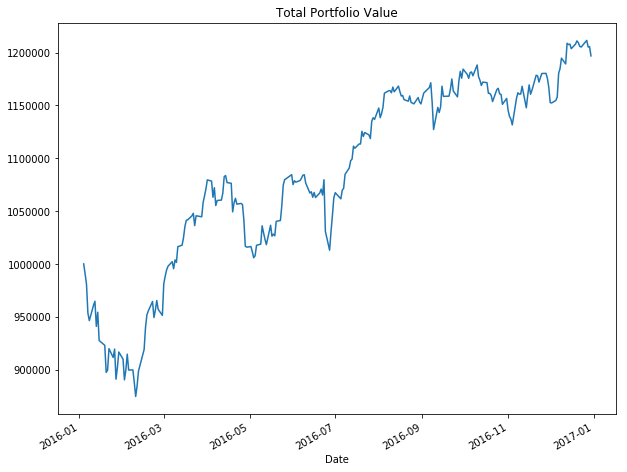

In [17]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

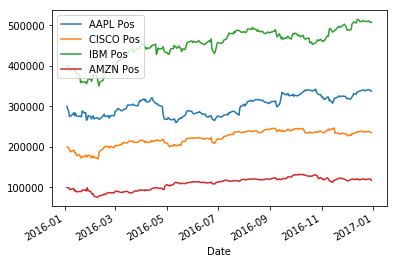

In [18]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

In [19]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2016-12-23,339192.039897,237421.566711,509109.814410,119403.758301,1.205127e+06
2016-12-27,341346.194630,238588.066384,510422.976309,121100.802210,1.211458e+06
2016-12-28,339890.684675,236566.133618,507521.804671,121215.403696,1.205194e+06
2016-12-29,339803.354078,236877.200197,508773.889273,120119.625112,1.205574e+06
2016-12-30,337154.325960,235010.800721,506911.031695,117720.843341,1.196797e+06


# Portfolio Statistics
### Daily Returns

In [20]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

### Cumulative Return

In [21]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 19.679700171725955 was percent!


### Avg Daily Return

In [22]:
portfolio_val['Daily Return'].mean()

0.0007676462040705507

### Std Daily Return

In [23]:
portfolio_val['Daily Return'].std()

0.01016567925887433

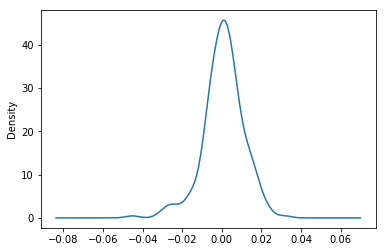

In [24]:
portfolio_val['Daily Return'].plot(kind='kde')

# Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). If you are in a different country with higher rates for your trading currency, you can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

Other values people use are things like the 3-month treasury bill or [LIBOR](http://www.investopedia.com/terms/l/libor.asp).

Read more: Sharpe Ratio http://www.investopedia.com/terms/s/sharperatio

In [25]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [26]:
SR

0.07551351803672329

In [27]:
ASR = (252**0.5)*SR

In [28]:
ASR

1.1987399360925617

In [29]:
portfolio_val['Daily Return'].std()

0.01016567925887433

In [30]:
portfolio_val['Daily Return'].mean()

0.0007676462040705507

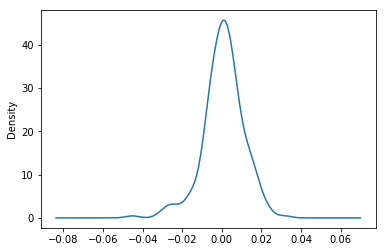

In [31]:
portfolio_val['Daily Return'].plot('kde')

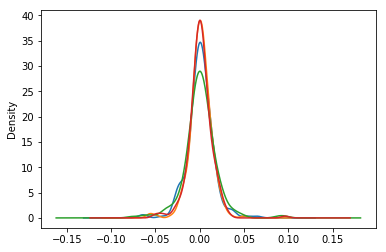

In [32]:
aapl['Adj. Close'].pct_change(1).plot('kde')
ibm['Adj. Close'].pct_change(1).plot('kde')
amzn['Adj. Close'].pct_change(1).plot('kde')
cisco['Adj. Close'].pct_change(1).plot('kde')

In [33]:
import numpy as np
np.sqrt(252)* (np.mean(.001-0.0002)/.001)

12.699606293110037